<a href="https://colab.research.google.com/github/machave11/Bank-Marketing-Effectiveness-prediction/blob/main/Nikhil_Machave_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
bank_df = pd.read_csv('/content/drive/MyDrive/bank-full.csv', encoding = 'utf-8', delimiter=";")

In [79]:
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [80]:
bank_df.pdays

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [81]:
bank_df.shape

(45211, 17)

In [82]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [83]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [84]:
# Checking duplicate values
bank_df.duplicated().sum()

0

In [85]:
bank_df.describe(include='object')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In our 10 categorical columns

job and month- has 12 unique categories

education, poutcome- has 4 unique categories

marital, contact- has 3 unique categories

In [86]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [87]:
#Removing outliers from call duration
bank_df = bank_df[~((bank_df['duration']>2000) & (bank_df['y'] == 'no'))]

#Removing outliers from campaign
bank_df = bank_df[~(bank_df['campaign']>20)]

#Removing outliers from previous
bank_df = bank_df[~(bank_df['previous']>11)]

In [88]:
# lets see the categorical value and integer
catvar=bank_df.select_dtypes(include=['object']).columns
numvar=bank_df.select_dtypes(include=['int32', 'int64', 'float32','float64']).columns

In [89]:
print(catvar)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [90]:
print(numvar)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [91]:
bank_df['y'].value_counts()

no     39463
yes     5246
Name: y, dtype: int64

# Univariate analysis of categorical variable

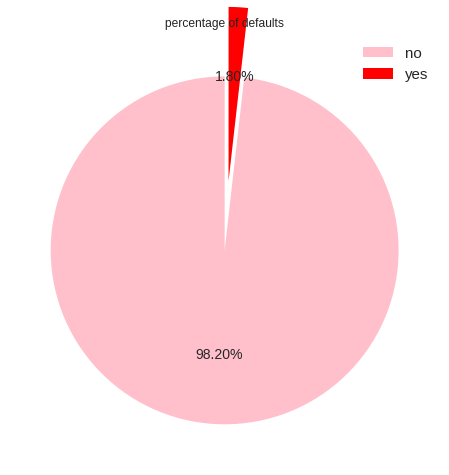

In [92]:
plt.figure(figsize=(10,8))
labels = bank_df['default'].value_counts().index.tolist()
sizes = bank_df['default'].value_counts().tolist()
explode=(0,0.4)
colors =['pink', 'red']
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('percentage of defaults')
plt.legend(labels, loc=1, prop = {'size': 15})

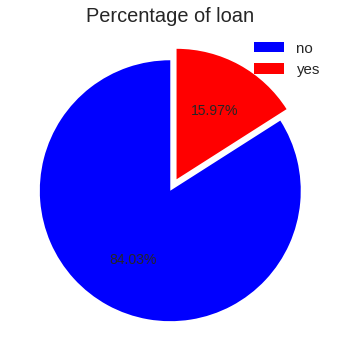

In [93]:
plt.figure(figsize=(7,6))
labels = bank_df['loan'].value_counts().index.tolist()
sizes = bank_df['loan'].value_counts().tolist()
explode = (0, 0.1)
colors = ['blue','red']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of loan', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})


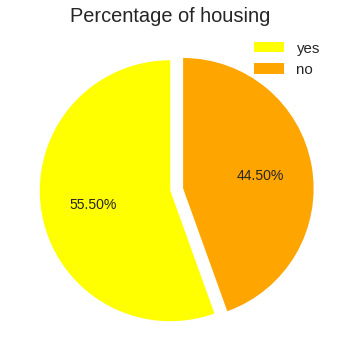

In [94]:
plt.figure(figsize=(7,6))
labels = bank_df['housing'].value_counts().index.tolist()
sizes = bank_df['housing'].value_counts().tolist()
explode = (0, 0.1)
colors = ['yellow','orange']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of housing', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})

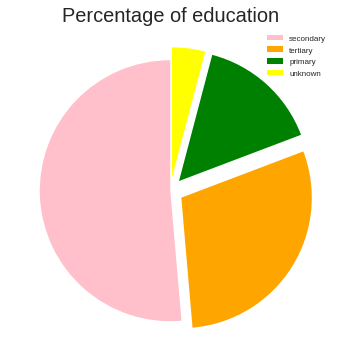

In [95]:
plt.figure(figsize=(10,6))
labels = bank_df['education'].value_counts().index.tolist()
sizes = bank_df['education'].value_counts().tolist()
explode = (0, 0.1,0.1,0.1)
colors = ['pink','orange','green','yellow']
plt.pie(sizes, explode=explode, colors=colors, startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of education', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 8})

In [96]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

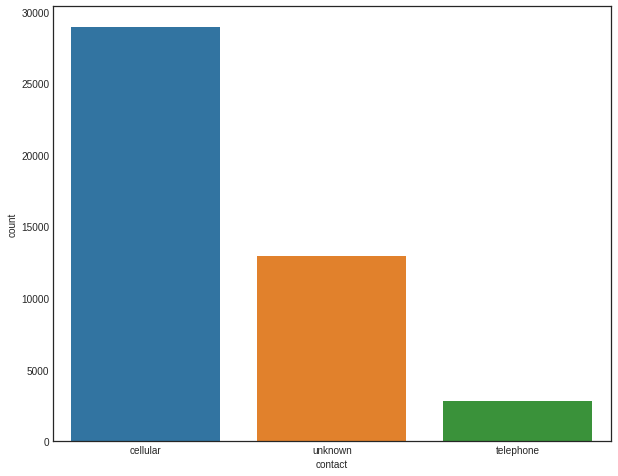

In [97]:
plt.figure(figsize=(10,8))
sns.countplot(x='contact', data=bank_df, order=bank_df['contact'].value_counts().index)
plt.show()

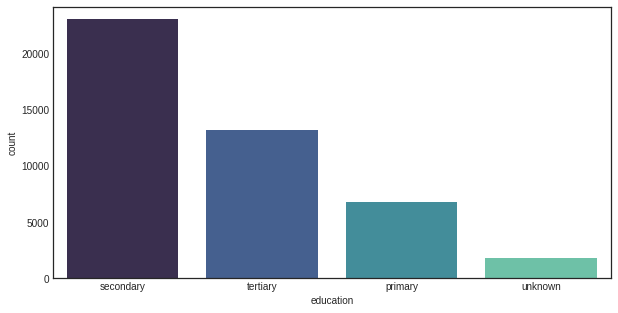

In [98]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'education',
              data = bank_df,
              order = bank_df['education'].value_counts().index,palette="mako")
plt.show()

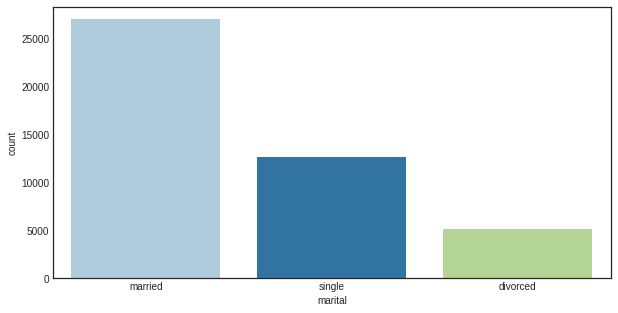

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'marital',
              data = bank_df,
              order = bank_df['marital'].value_counts().index,palette="Paired")
plt.show()

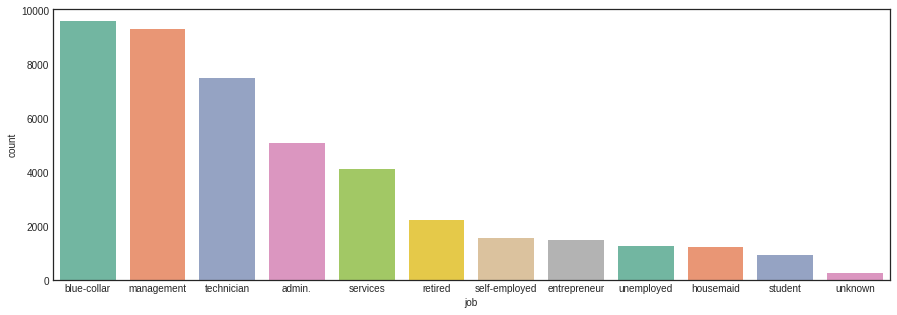

In [100]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'job',
              data = bank_df,
              order = bank_df['job'].value_counts().index,palette="Set2")
plt.show()

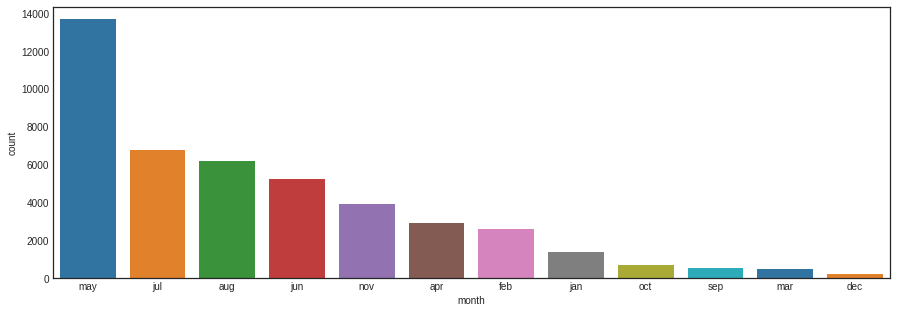

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'month',
              data = bank_df,
              order = bank_df['month'].value_counts().index,palette="tab10")
plt.show()

# Univarient Analysis on numerical data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


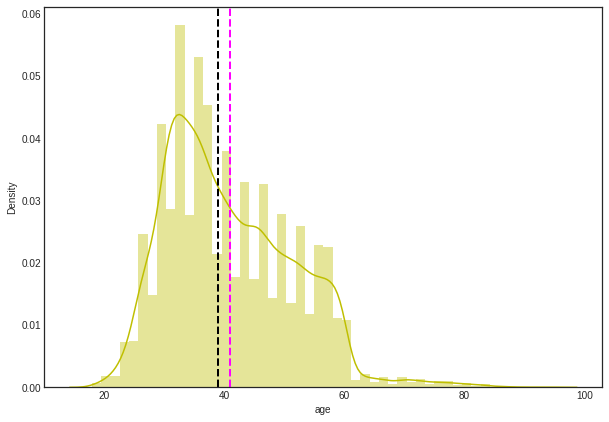

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


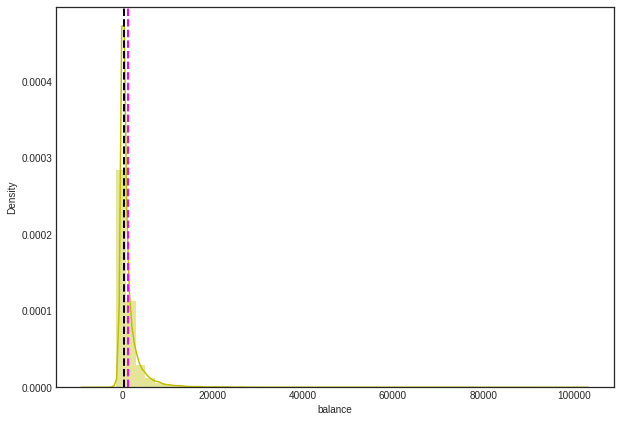

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


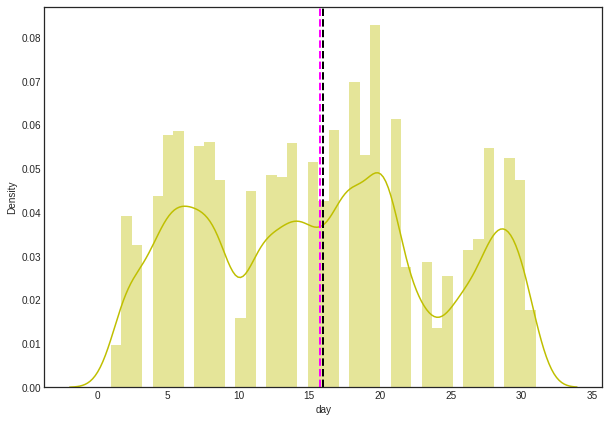

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


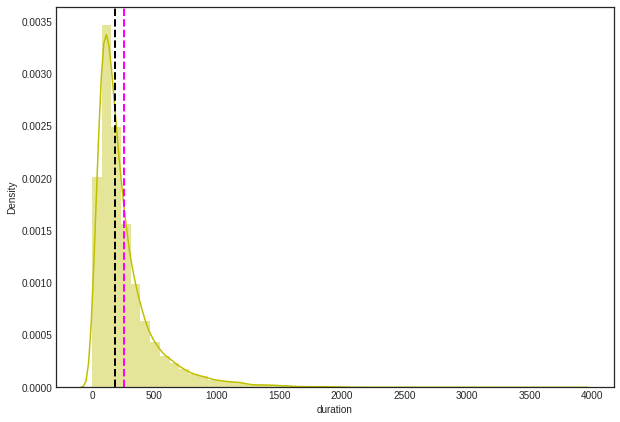

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


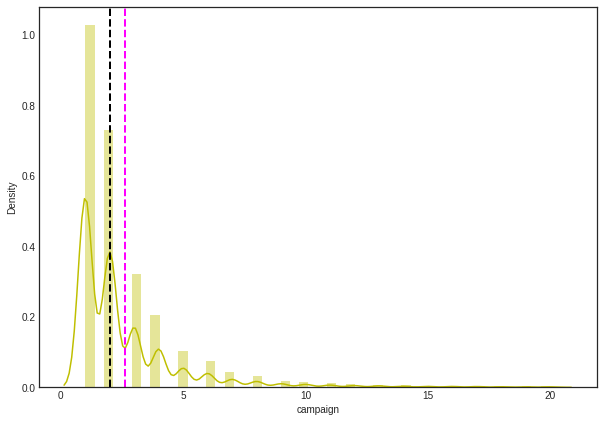

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


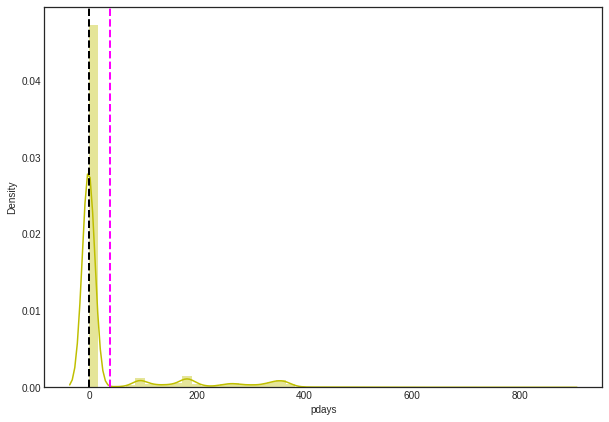

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


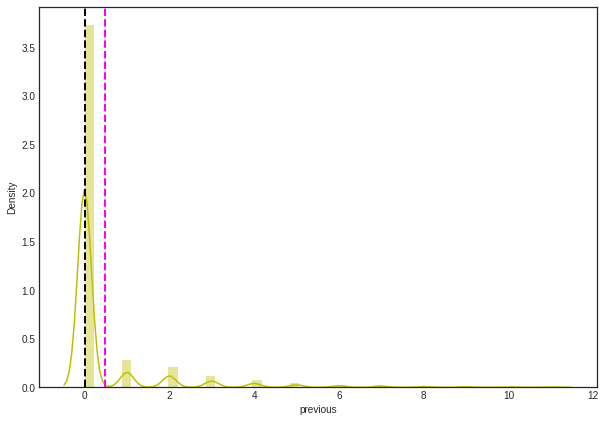

In [102]:
def distplot(col):

  plt.figure(figsize=(10,7))
  plt.xlabel(col)
  ax=sns.distplot(bank_df[col],hist=True,color='y')
  ax.axvline(bank_df[col].mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(bank_df[col].median(),color='black',linestyle='dashed',linewidth=2)
  plt.show()

for col in numvar:
    distplot(col)

# Bivarient Analysis

In [103]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

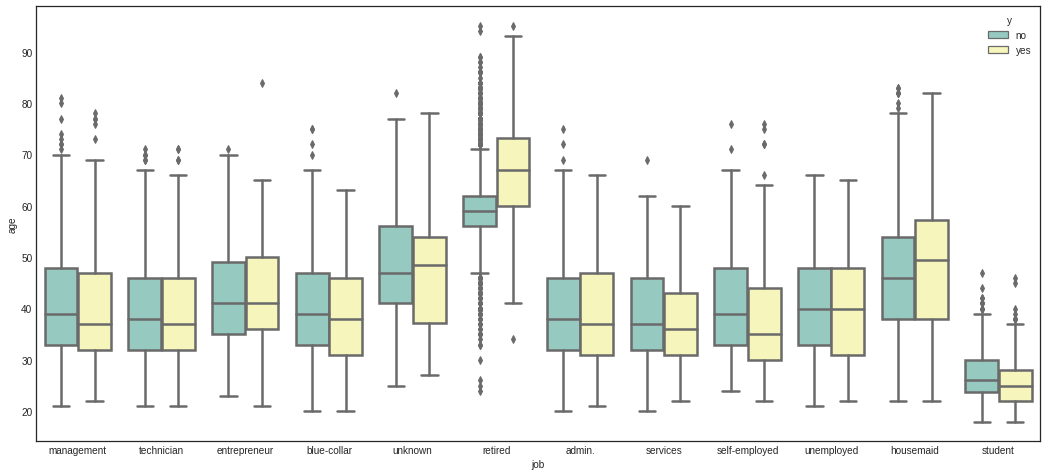

In [104]:
plt.figure(figsize=(18,8))
sns.boxplot(x="job", y="age", hue="y",
                 data=bank_df, palette="Set3",linewidth=2.5)

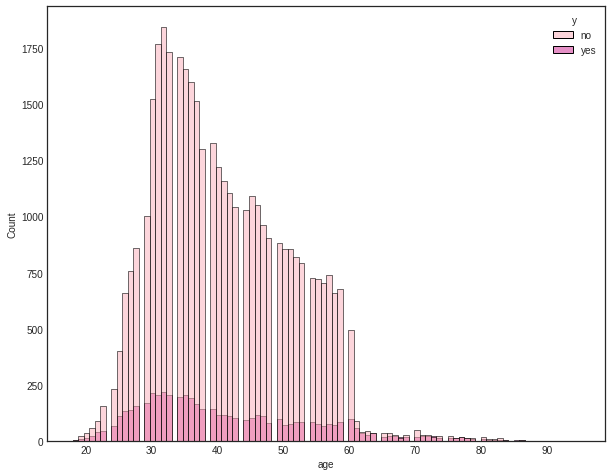

In [105]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_df, x="age",hue="y",palette='RdPu')

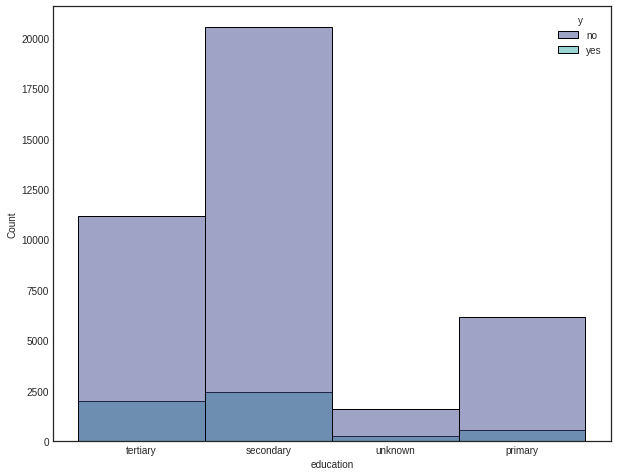

In [106]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_df, x='education',hue="y",palette= 'mako')

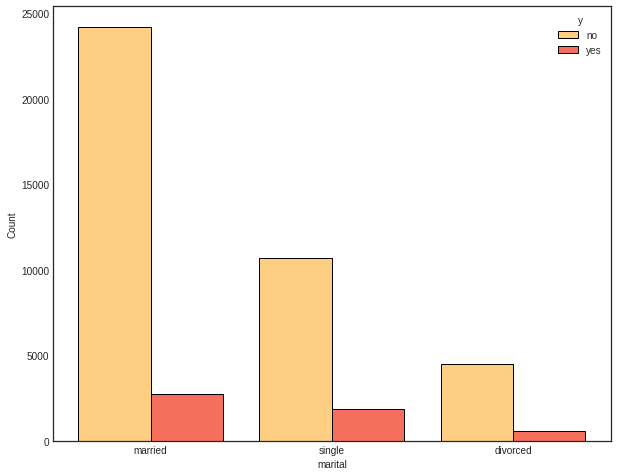

In [107]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_df, x="marital", hue="y", multiple="dodge", shrink=.8,palette='YlOrRd')

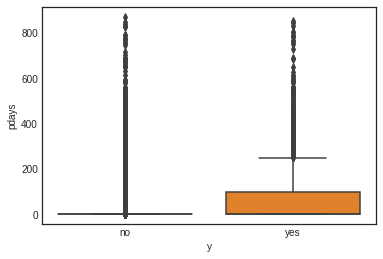

In [108]:
sns.boxplot(y='pdays',x="y", data= bank_df)

# Multivarient Scatter plot

Text(0.5, 1.0, 'Number of call in current campaign v/s Call Duration')

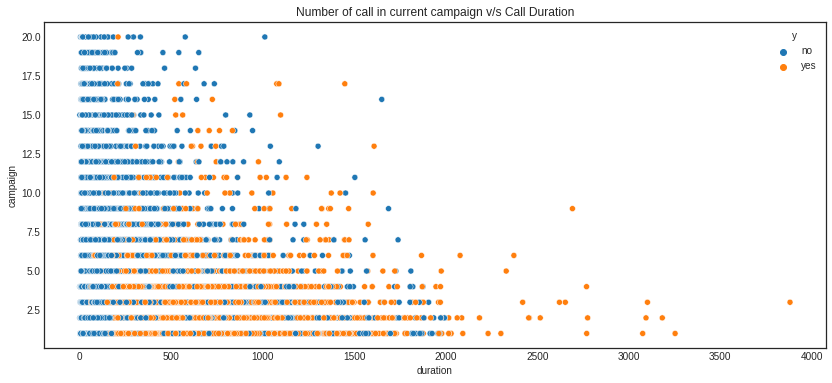

In [109]:
#Lets try to find some more insights 
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.duration, y= bank_df.campaign, hue = bank_df.y)
plt.title('Number of call in current campaign v/s Call Duration')

Conclusion - The sucess ratio is more for less number of contact in this campaign

Text(0.5, 1.0, 'Customer Balance v/s Call Duration')

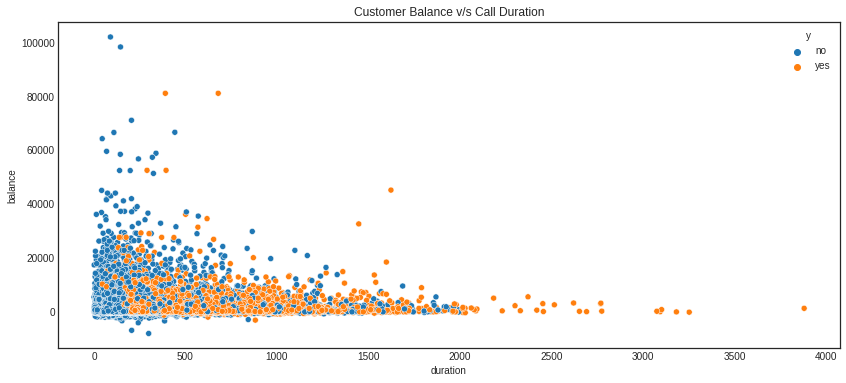

In [110]:
#Scatter plot visulization
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.duration, y= bank_df.balance, hue = bank_df.y)
plt.title('Customer Balance v/s Call Duration')

conclusion - The most of customer who have taken term deposit do not have very high balance.

Text(0.5, 1.0, 'Customer age v/s Pdays')

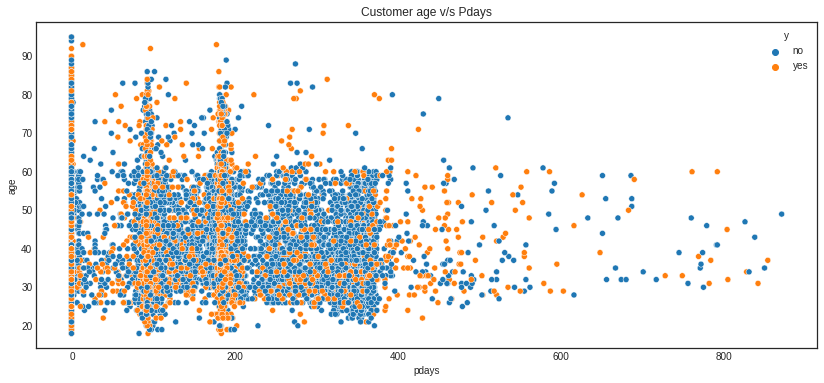

In [111]:
#representing the term deposit variation
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.pdays, y= bank_df.age, hue = bank_df.y)
plt.title('Customer age v/s Pdays')

Conclusion -  Above scatter plot is portrey that most of the client that had been last contacted falls in 0-400(days)

# Strip plot among Numerical and categorical features

In [112]:
numerical = ['age',	'balance',	'duration','campaign',	'pdays',	'previous']
categorical = ['job','marital','education','default','housing',	'loan',	'contact',	'month',	'poutcome']

#Total numbers of plots = 5x9 = 45

<Figure size 1008x432 with 0 Axes>

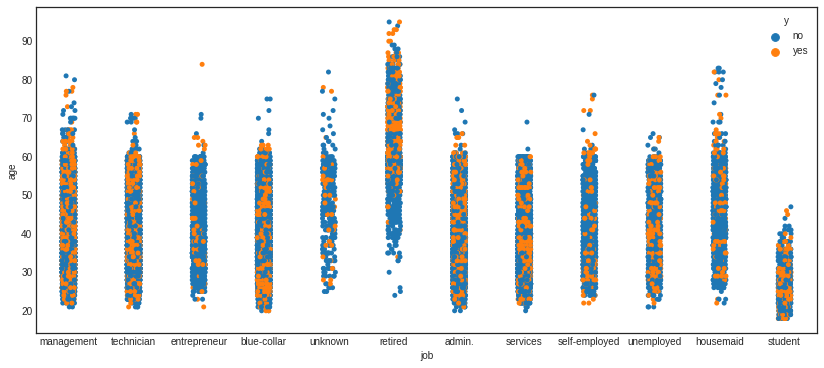

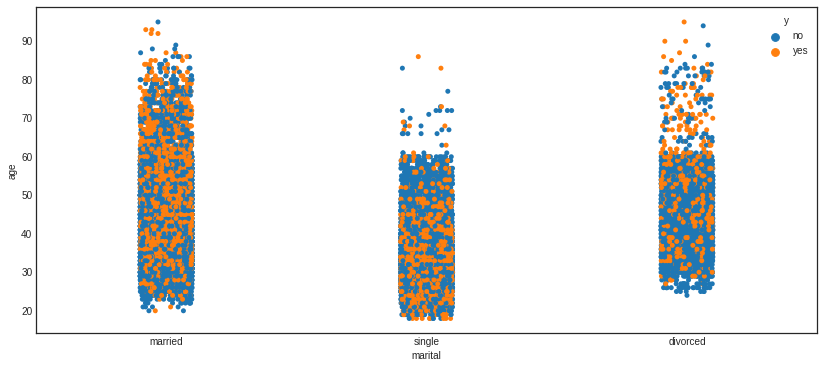

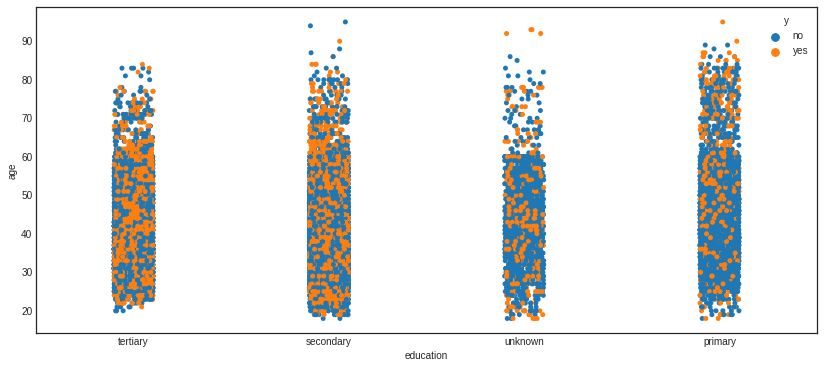

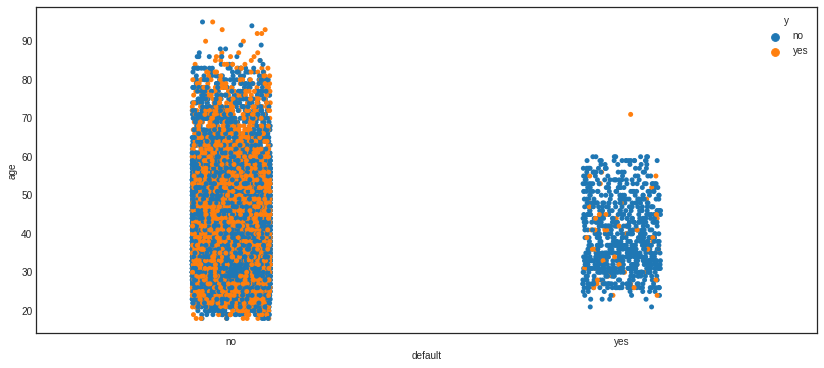

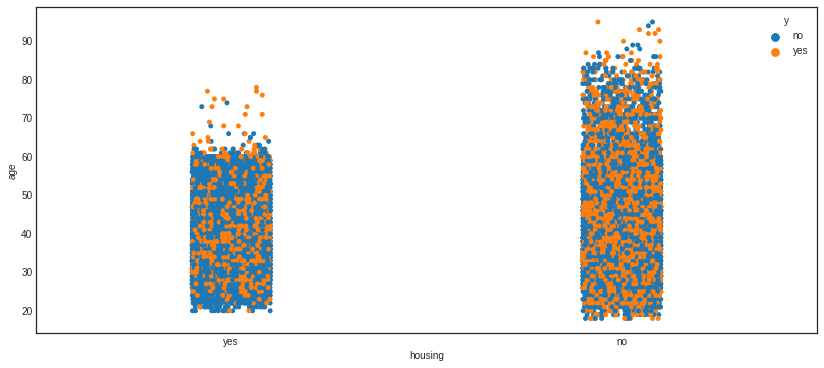

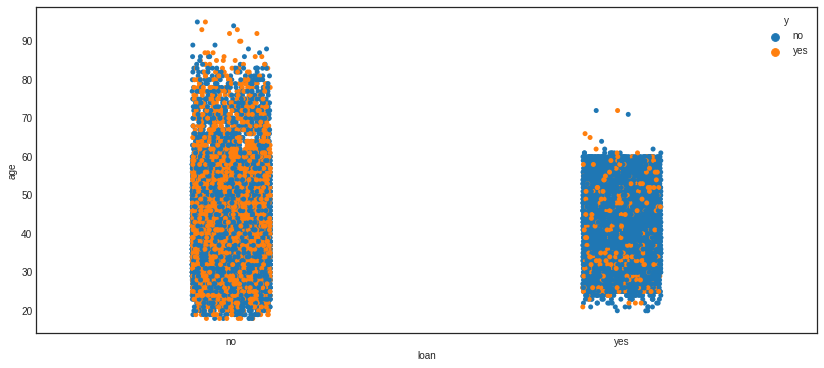

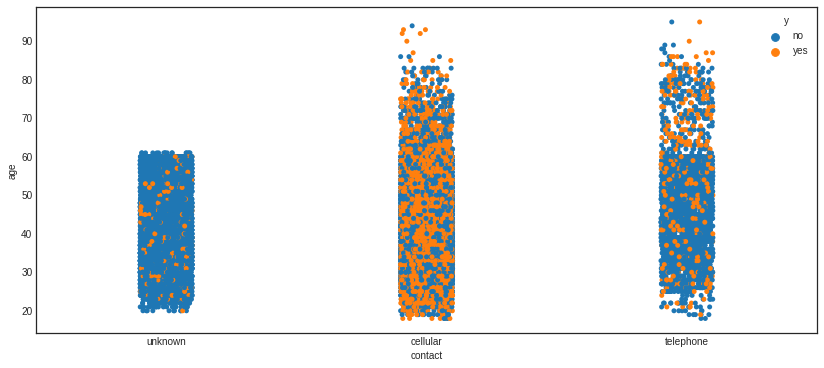

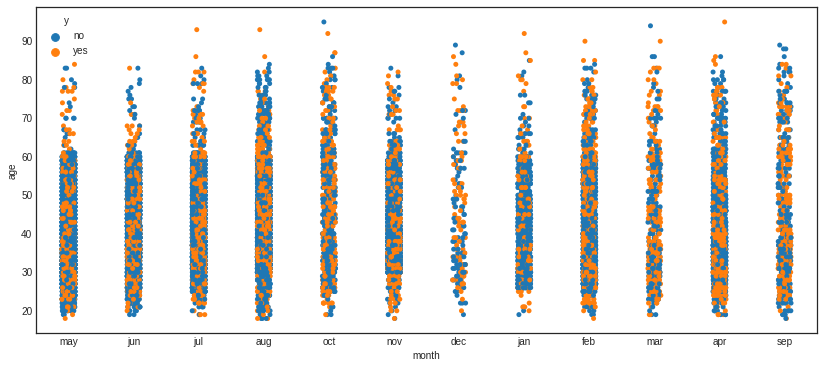

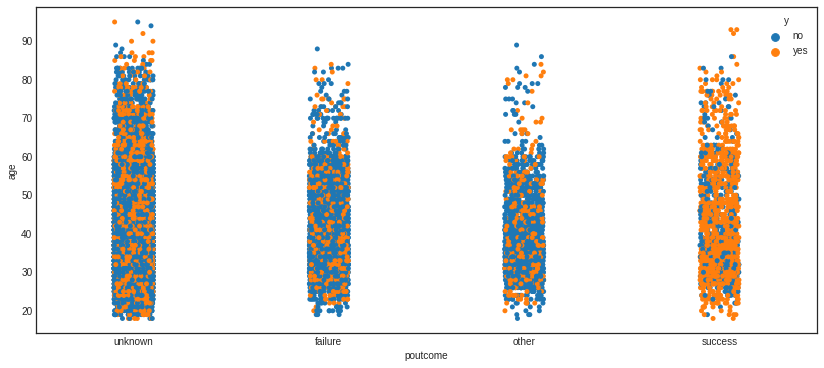

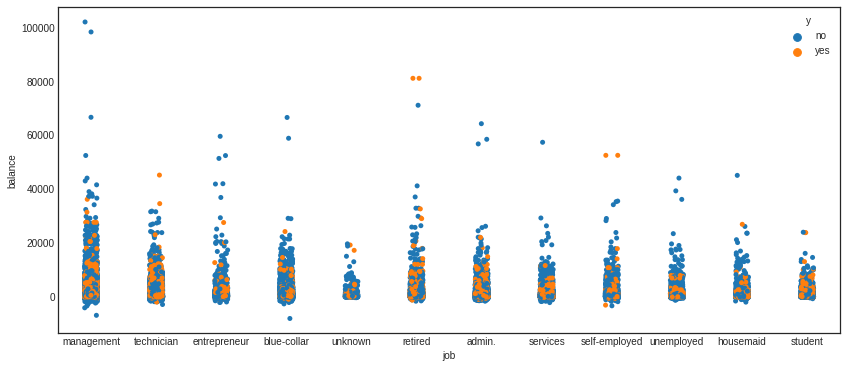

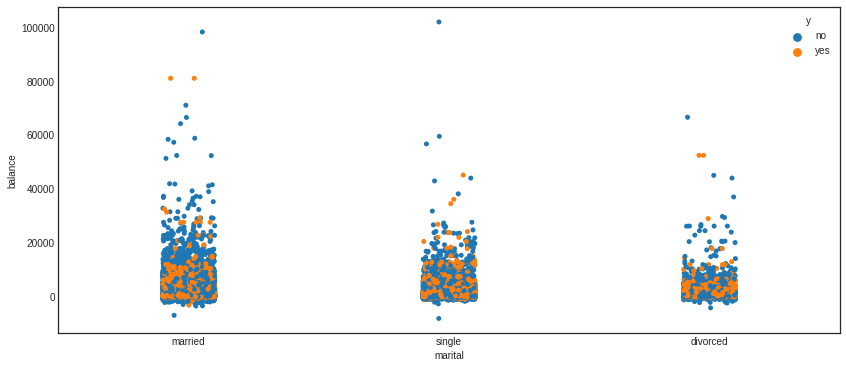

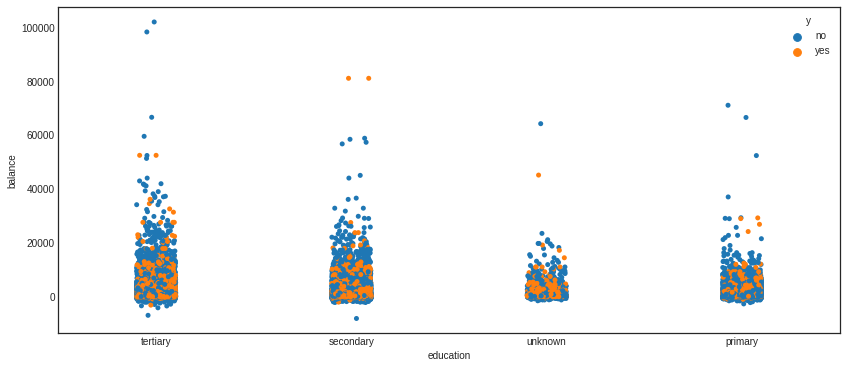

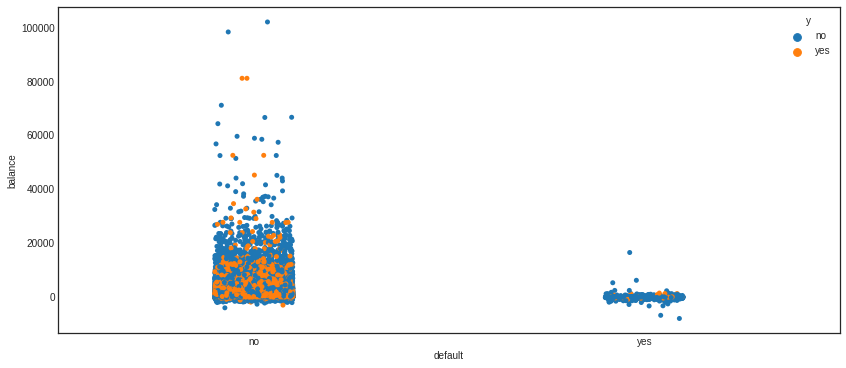

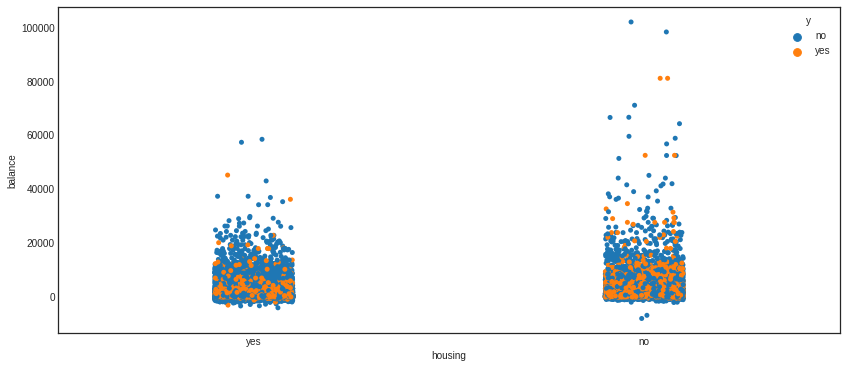

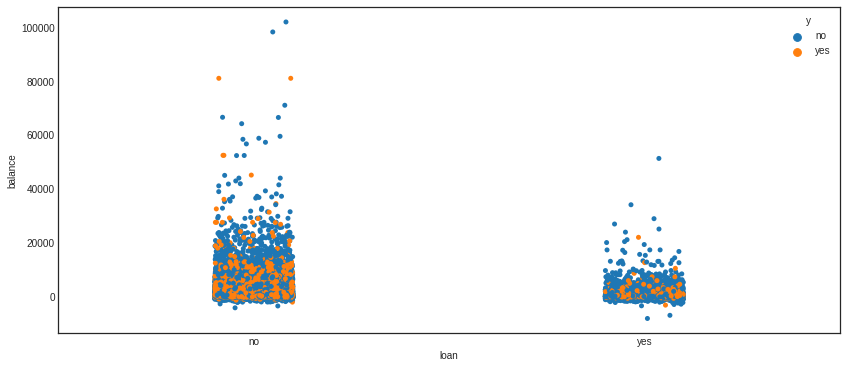

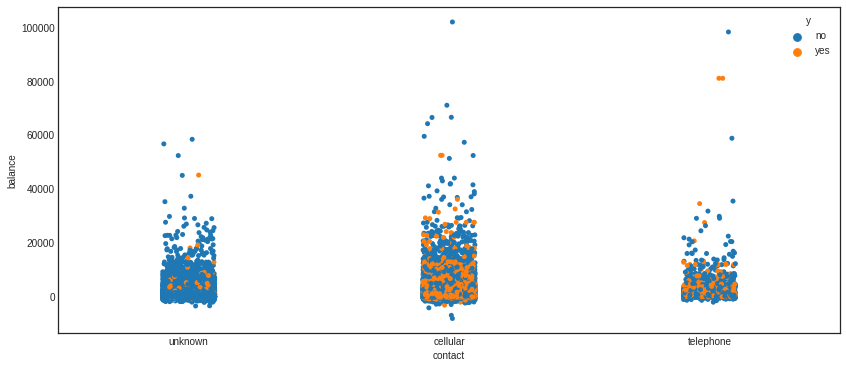

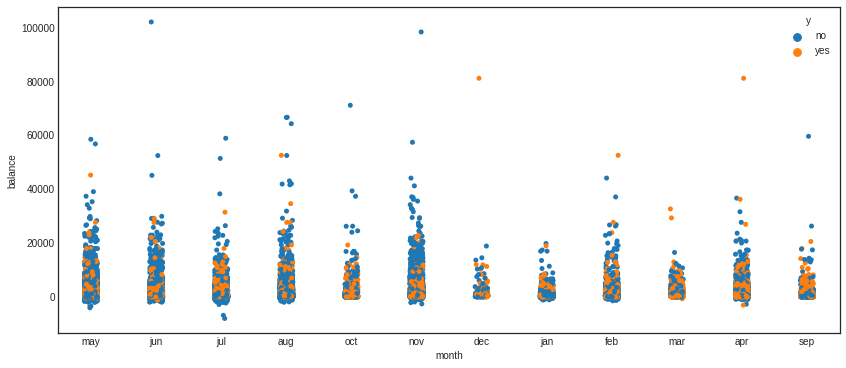

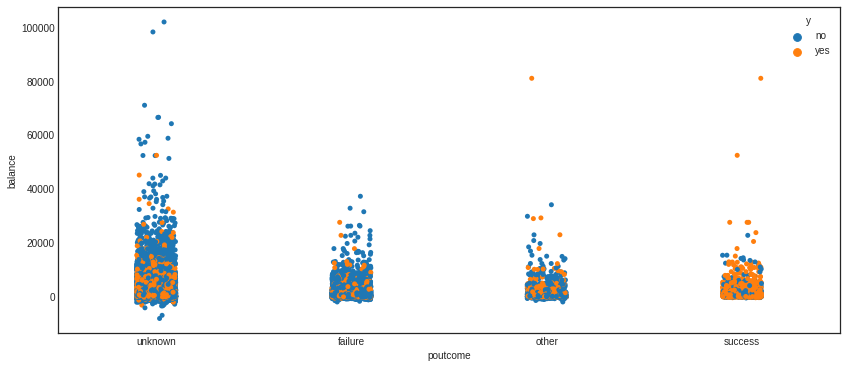

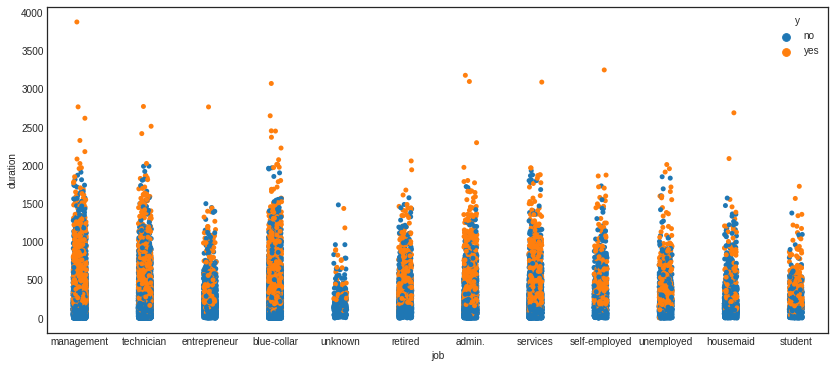

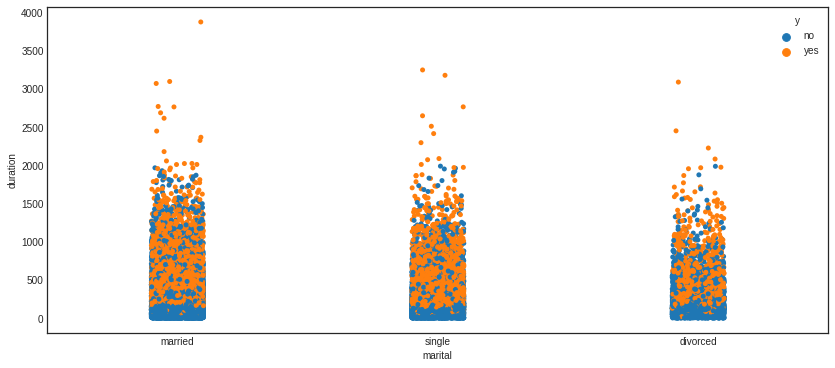

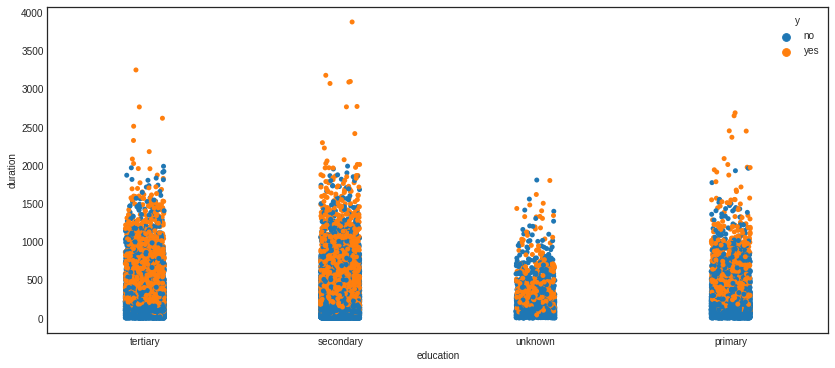

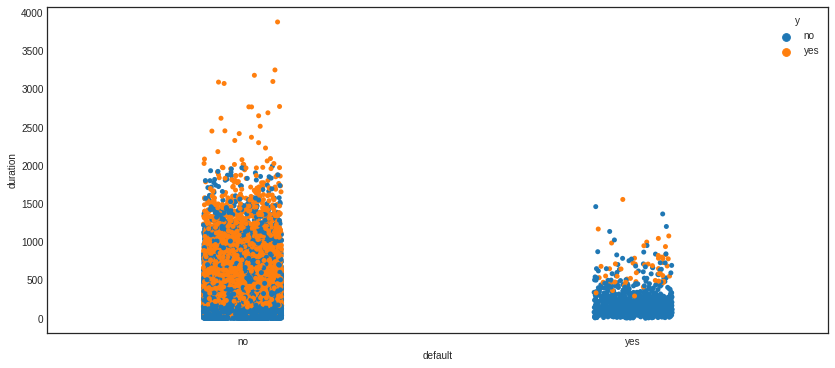

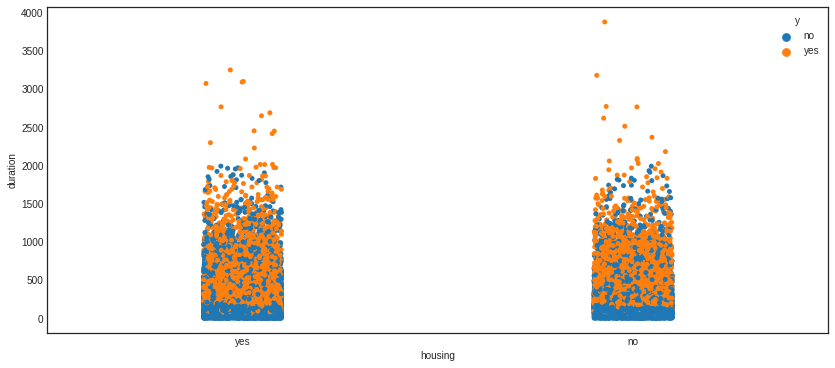

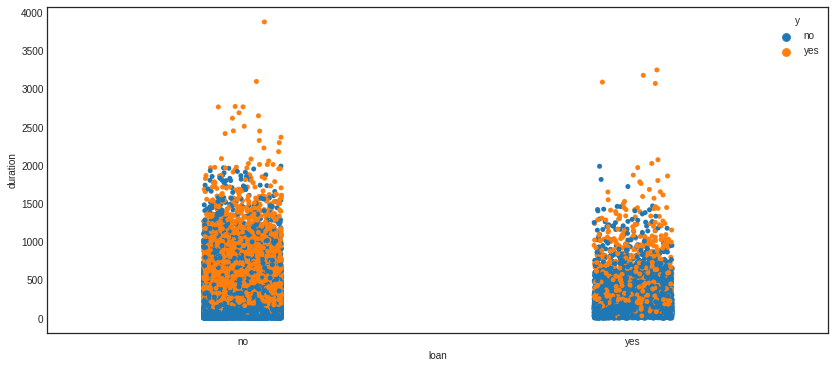

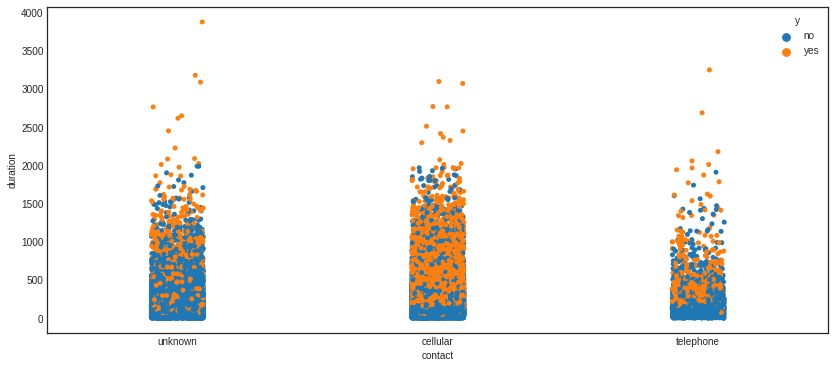

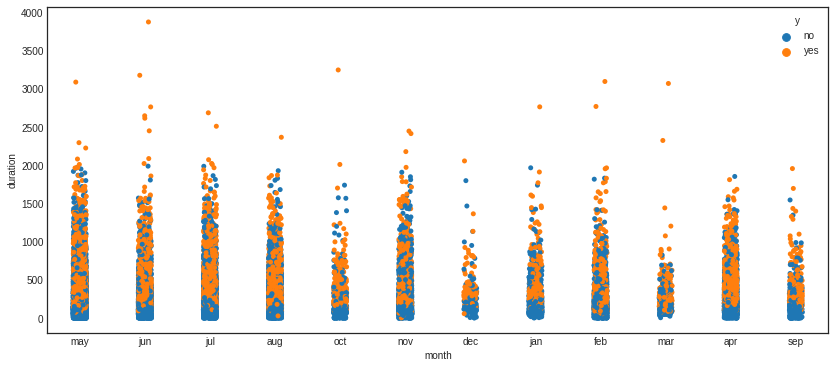

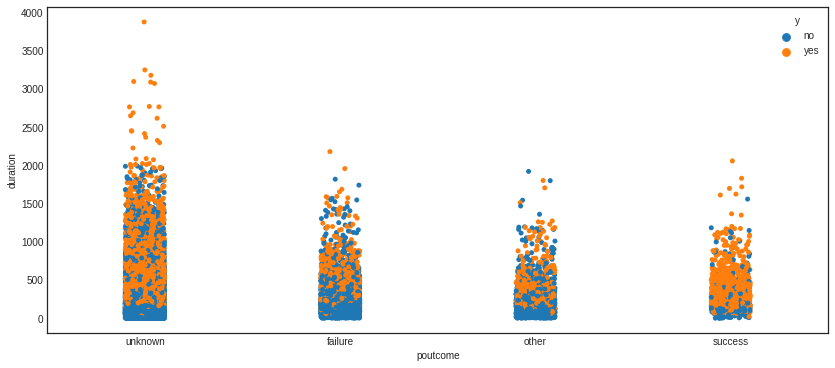

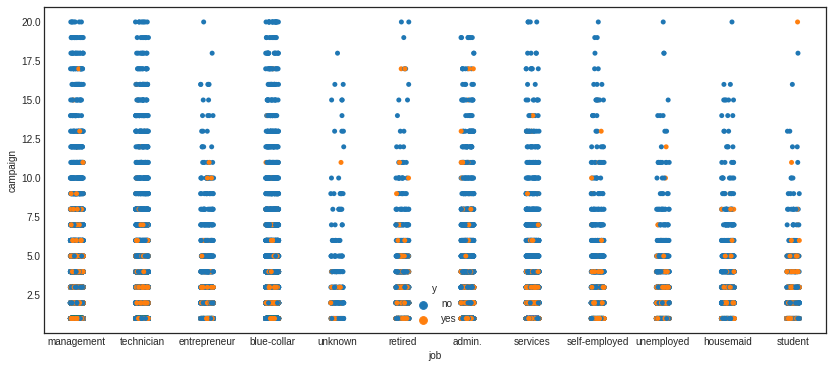

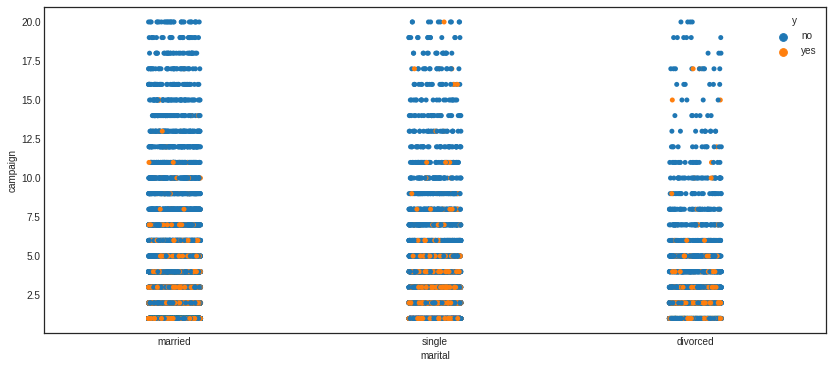

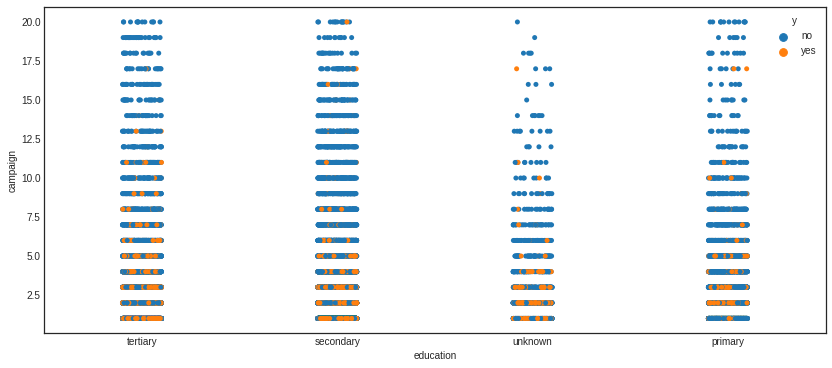

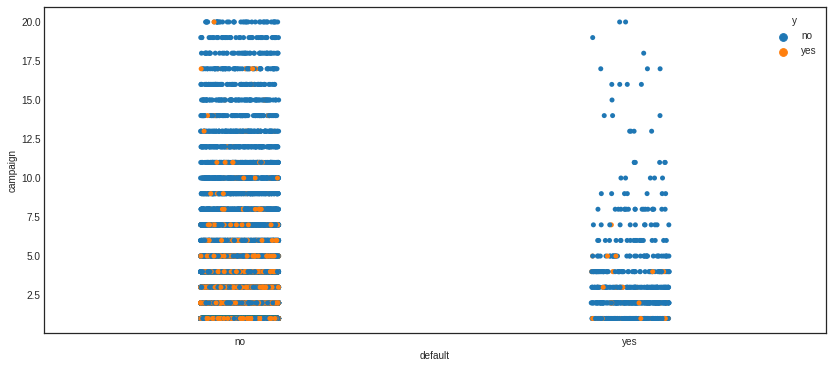

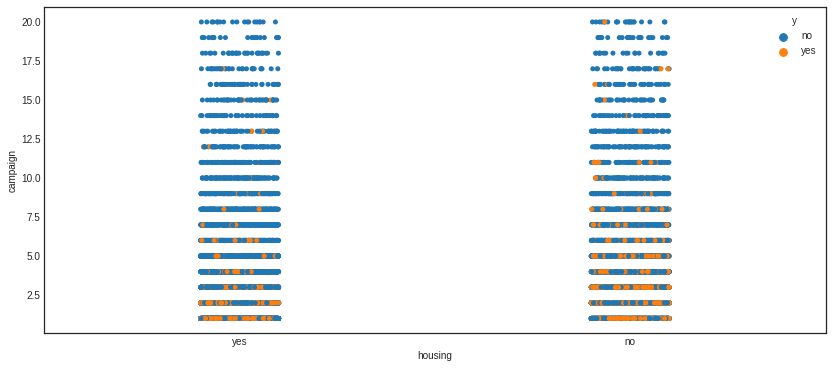

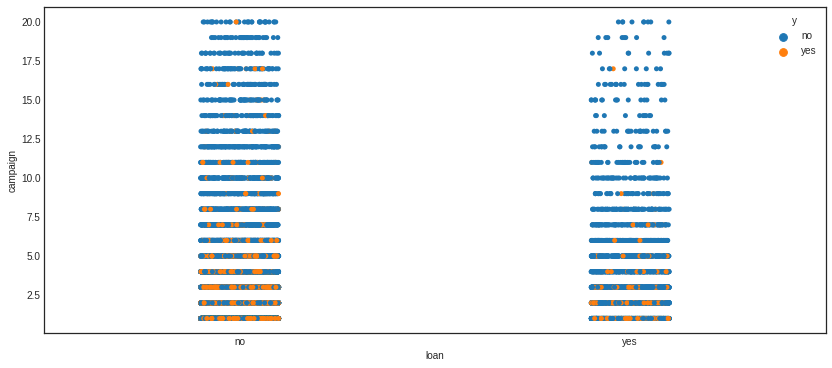

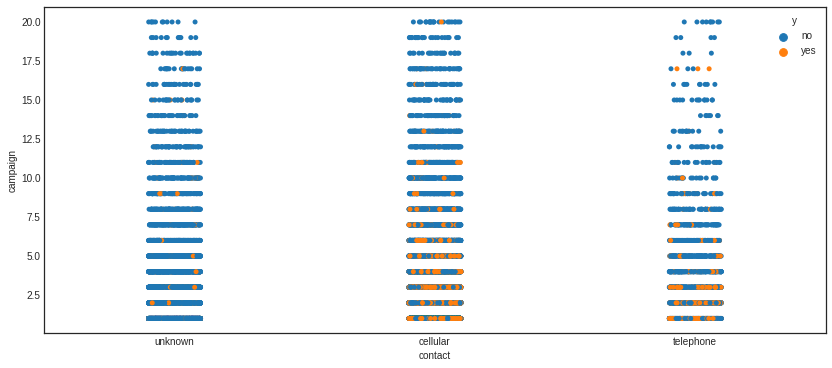

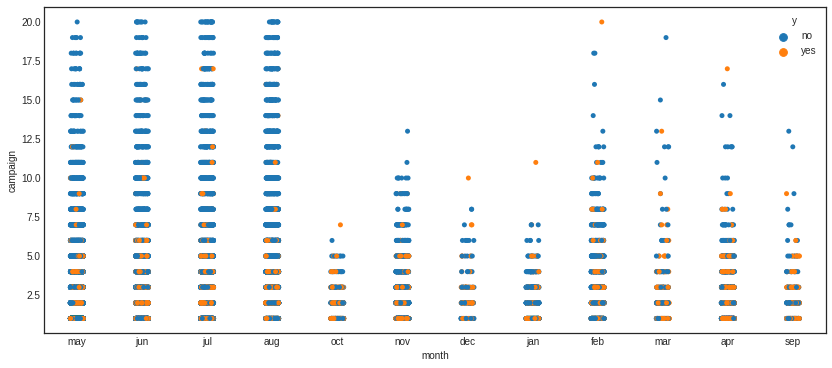

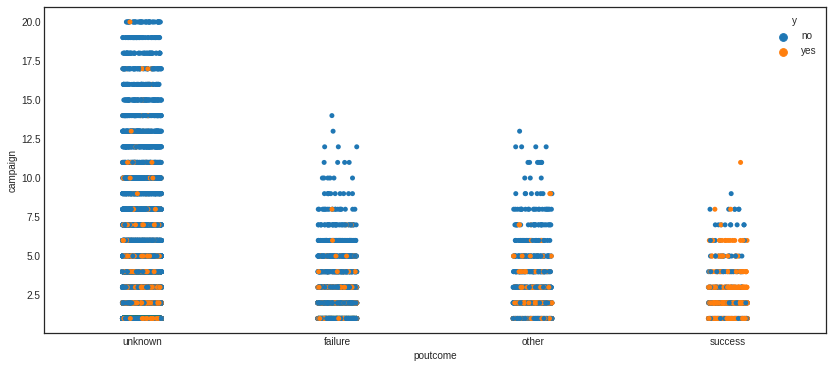

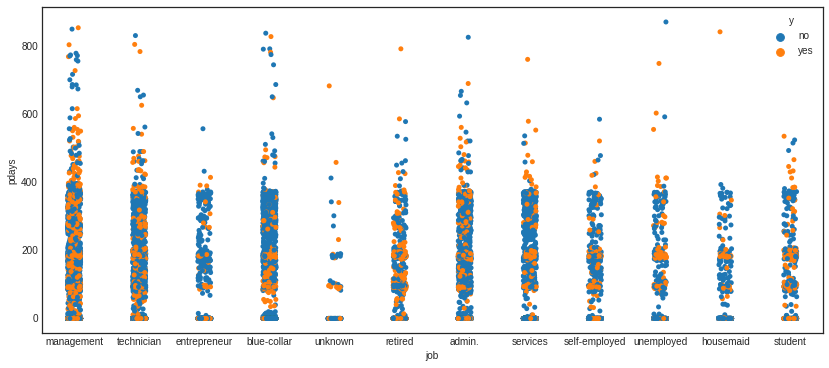

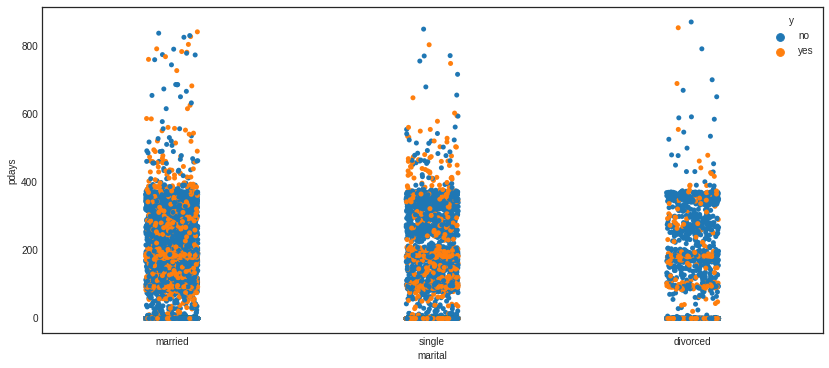

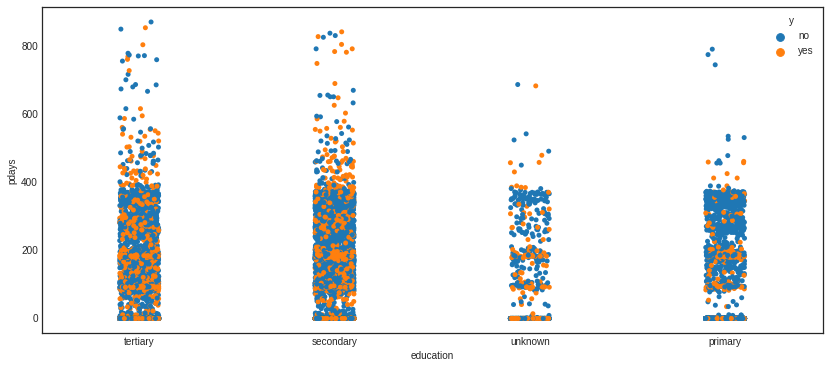

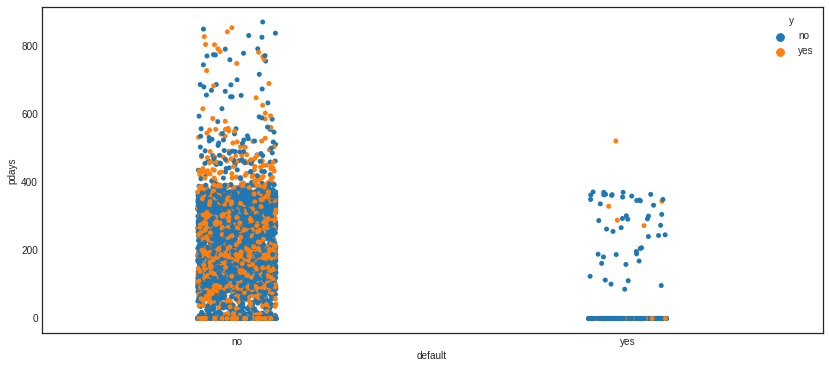

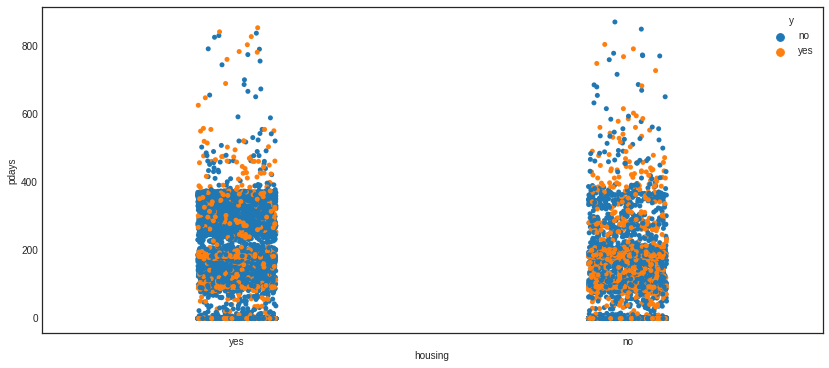

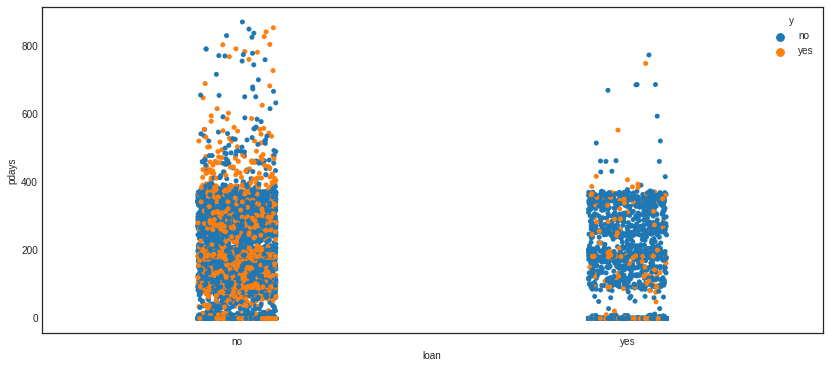

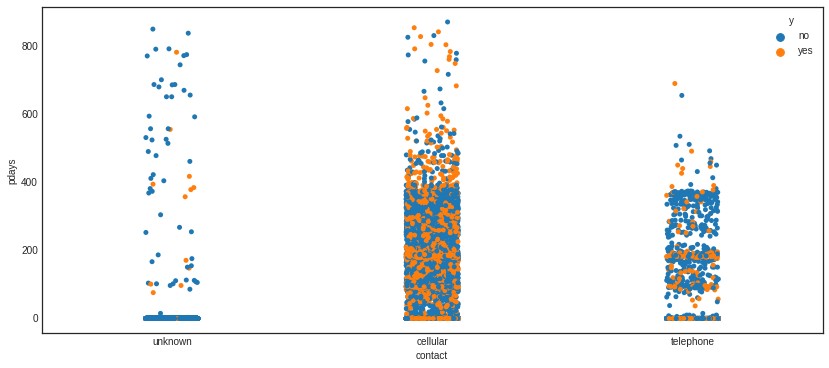

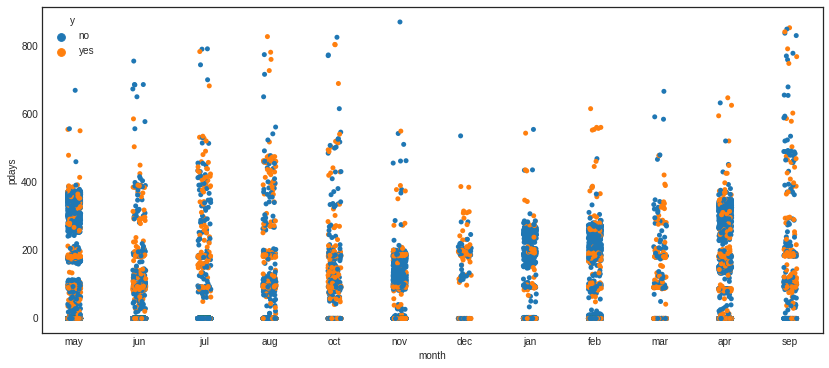

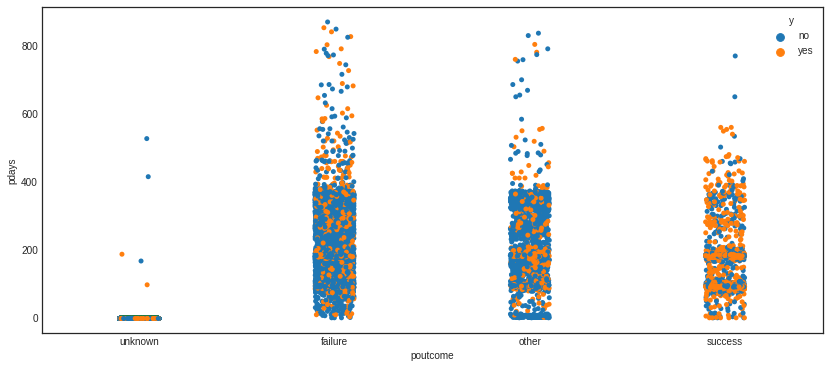

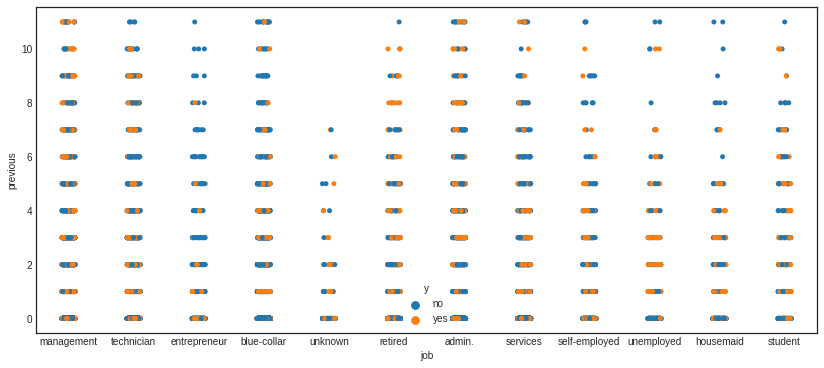

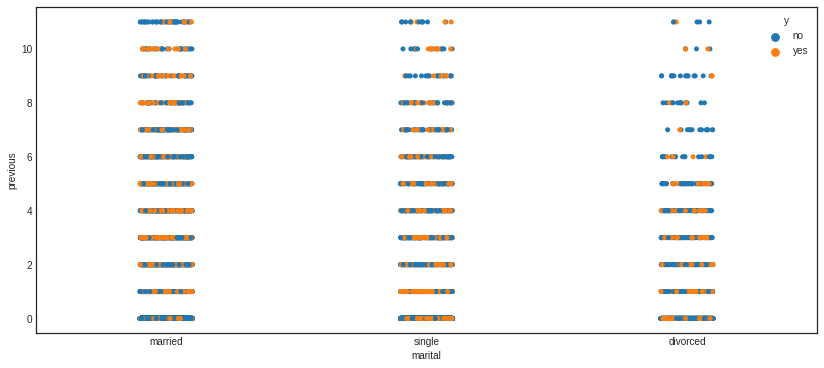

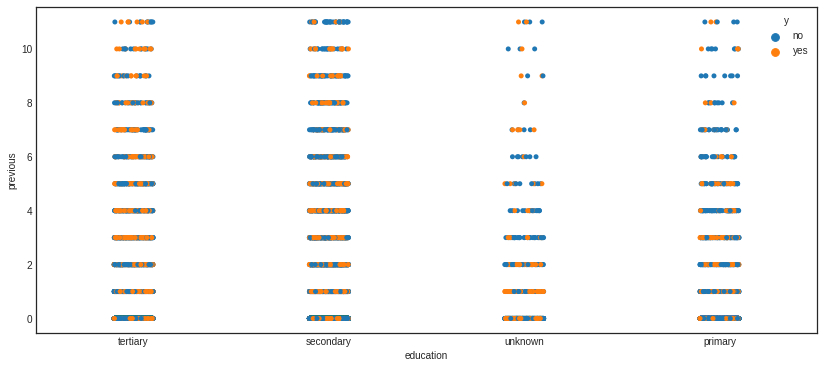

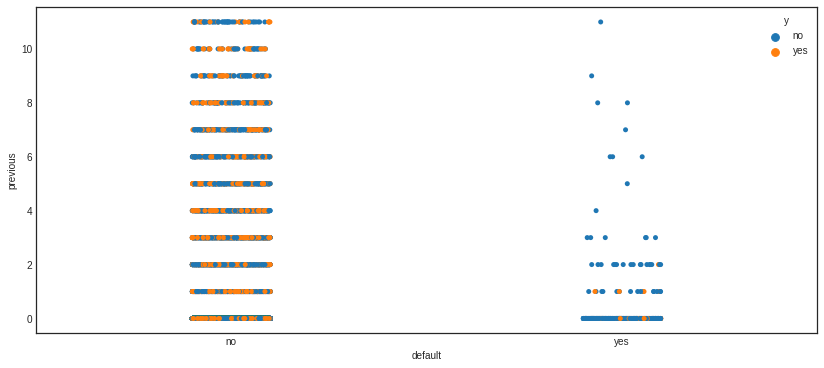

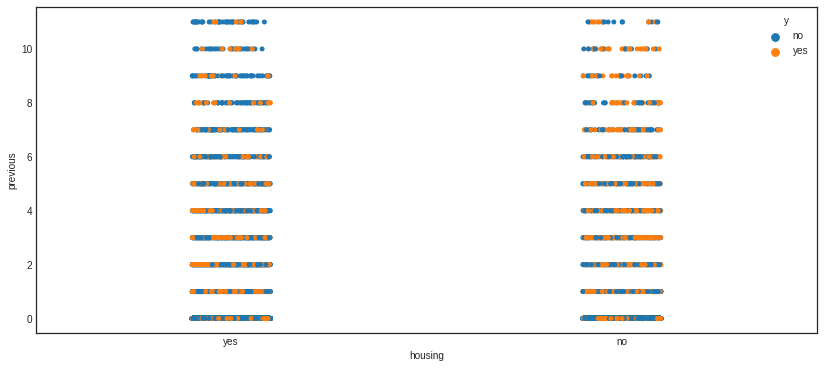

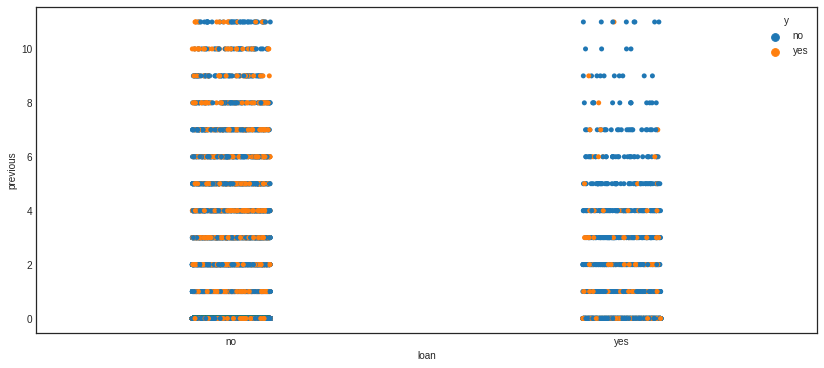

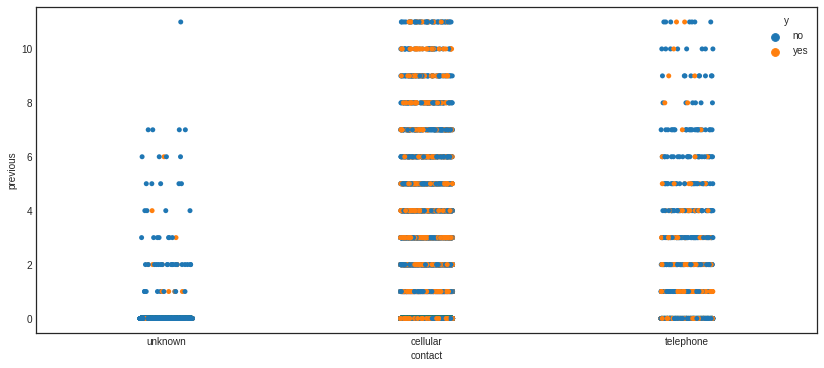

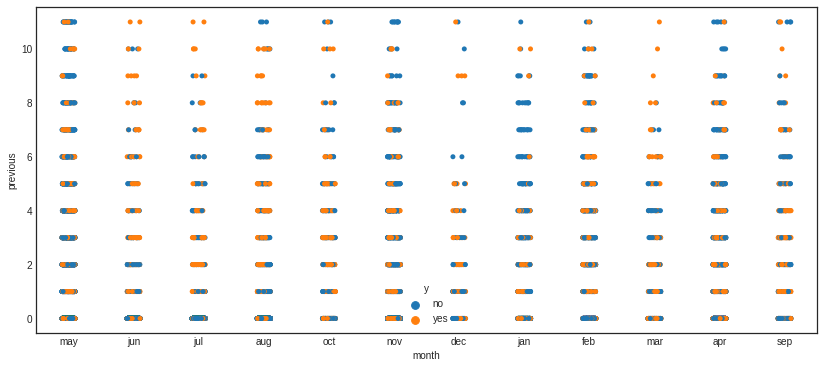

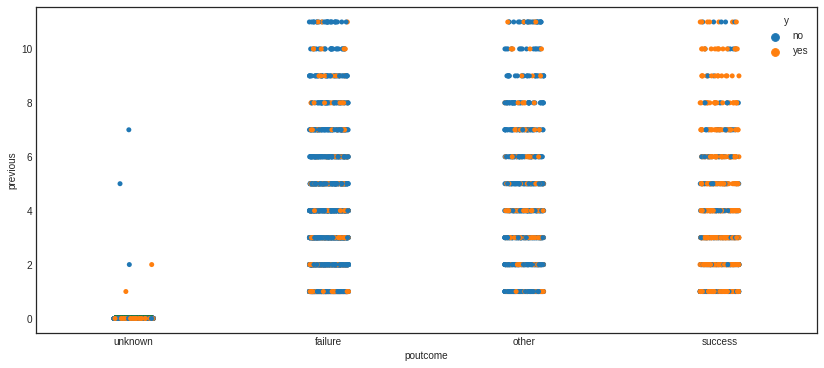

In [113]:
plt.figure(figsize=(14,6))
for num in numerical:
  for cat in categorical:
    plt.figure(figsize=(14,6))
    sns.stripplot(x= cat, y=num, hue="y", data=bank_df)
    plt.show()

Conclusion- The above striplots helped in distinguishing each feature for yes and no and analyzing them for feature engineering.

In [114]:
nbdf = bank_df.copy()

In [115]:
nbdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [116]:
#Removing outliers from call duration
nbdf = nbdf[~((nbdf['duration']>2000) & (nbdf['y'] == 'no'))]

#Removing outliers from campaign
nbdf = nbdf[~(nbdf['campaign']>20)]

#Removing outliers from previous
nbdf = nbdf[~(nbdf['previous']>11)]

Conclusion-

In duration we removed those observation with no output and duration> 2000s

In campaign we removed campaigns> 20

In previous we removed observations for previous contacts> 11

Reducing JOB categories

As we saw above, job has 12 categories, thus it will be good to reduce them. For this we combined few categories into one such as

admin+services = adms

enterpenure + selfemployed + unemployed + unknown + housemade = others

retired + student = rstd

In [117]:
print(nbdf.job.nunique())
nbdf.job.unique()

12


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [118]:
#Creating dictionary of different job type
job_dict = {'entrepreneur': 'others', 'unknown':'others', 'retired':'rstd', 'admin.':'adms', 'services':'adms',
            'self-employed':'others','unemployed':'others', 'housemaid':'others', 'student':'rstd', 'management':'management',
            'technician':'technician', 'blue-collar':'blue-collar'}
#creating new column new_job after maping
nbdf['new_job'] = nbdf.job.map(job_dict)    
print(nbdf.new_job.nunique())
nbdf.new_job.unique()       

6


array(['management', 'technician', 'others', 'blue-collar', 'rstd',
       'adms'], dtype=object)

In [119]:
nbdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

       new_job  
0   management  
1   technician  
2       others  
3  blue-collar  
4       others

In [120]:
pd.DataFrame(nbdf.groupby('new_job')['y'].value_counts(normalize= True)).T

new_job      adms           blue-collar           management            \
y              no       yes          no       yes         no       yes   
y        0.892443  0.107557    0.926966  0.073034   0.861696  0.138304   

new_job    others                rstd           technician          
y              no       yes        no       yes         no     yes  
y        0.889231  0.110769  0.754331  0.245669     0.8892  0.1108

In [121]:
#Creating dictionary of different job type from new_job
job_dict_o = {'adms':2,	'blue-collar':1,	'management':5,	'others':3,	'rstd':6,	'technician':4}

#creating new column new_job_o after maping
nbdf['new_job_o'] = nbdf.new_job.map(job_dict_o)
nbdf.drop('job',axis=1,inplace=True)
nbdf.drop('new_job',axis=1,inplace=True)
print(nbdf.new_job_o.nunique())
nbdf.new_job_o.unique()

6


array([5, 4, 3, 1, 6, 2])

In [122]:
# Converting categorical variables into numeric

nbdf['marital'] = nbdf['marital'].astype('category').cat.codes
nbdf['education'] = nbdf['education'].astype('category').cat.codes
nbdf['contact'] = nbdf['contact'].astype('category').cat.codes
nbdf['poutcome'] = nbdf['poutcome'].astype('category').cat.codes
nbdf['month'] = nbdf['month'].astype('category').cat.codes
nbdf['default'] = nbdf['default'].astype('category').cat.codes
nbdf['loan'] = nbdf['loan'].astype('category').cat.codes
nbdf['housing'] = nbdf['housing'].astype('category').cat.codes

In [123]:
nbdf.replace(to_replace={'y':'yes'}, value=1, inplace=True)
nbdf.replace(to_replace={'y':'no'}, value=0, inplace=True)

In [124]:
nbdf.head(2)

age  marital  education  default  balance  housing  loan  contact  day  \
0   58        1          2        0     2143        1     0        2    5   
1   44        2          1        0       29        1     0        2    5   

   month  duration  campaign  pdays  previous  poutcome  y  new_job_o  
0      8       261         1     -1         0         3  0          5  
1      8       151         1     -1         0         3  0          4

In [125]:
nbdf['contact'] = nbdf['contact'].astype('category')
nbdf['poutcome'] = nbdf['poutcome'].astype('category')
nbdf['month'] = nbdf['month'].astype('category')
nbdf['default'] = nbdf['default'].astype('category')
nbdf['loan'] = nbdf['loan'].astype('category')
nbdf['housing'] = nbdf['housing'].astype('category')
nbdf['marital'] = nbdf['marital'].astype('category')
nbdf['education'] = nbdf['education'].astype('category')
nbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44709 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        44709 non-null  int64   
 1   marital    44709 non-null  category
 2   education  44709 non-null  category
 3   default    44709 non-null  category
 4   balance    44709 non-null  int64   
 5   housing    44709 non-null  category
 6   loan       44709 non-null  category
 7   contact    44709 non-null  category
 8   day        44709 non-null  int64   
 9   month      44709 non-null  category
 10  duration   44709 non-null  int64   
 11  campaign   44709 non-null  int64   
 12  pdays      44709 non-null  int64   
 13  previous   44709 non-null  int64   
 14  poutcome   44709 non-null  category
 15  y          44709 non-null  int64   
 16  new_job_o  44709 non-null  int64   
dtypes: category(8), int64(9)
memory usage: 3.8 MB


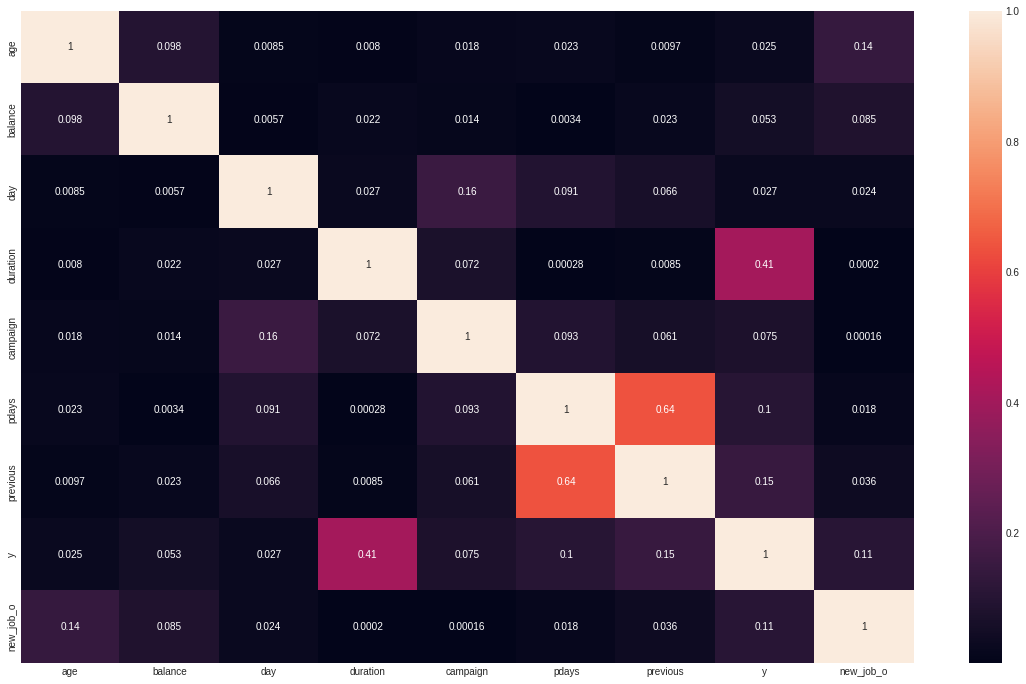

In [126]:
# Plotting correlation matrix
plt.subplots(figsize=(20,12))
sns.heatmap(nbdf.corr().abs(), annot=True)

Feature Selection

Feauture selection is one of the important step in machine learning. We have to choose them very wisely so that our model is trained well enough to predict the correct output. Thus, for selecting the right features we looked at the feature importance of decision tree.

In [127]:
# Independent feature with values
all_fet_value = nbdf.drop('y',axis=1)
label= nbdf['y']

# Applying Decision Tree Classifier

In [128]:
from sklearn.tree import DecisionTreeClassifier

dsc = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

dsc.fit(all_fet_value, label)
importances = dsc.feature_importances_
feature_names = all_fet_value.columns
indices = np.argsort(importances)

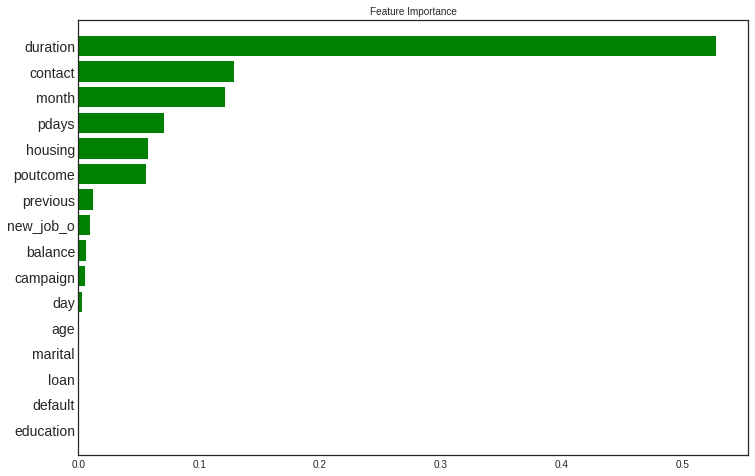

In [129]:
plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,8))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

Conclusion - From the above Decision tree feature importance we came to conclusion that only 'marital', 'age', 'day', 'campaign', 'balance', 'new_job_o', 'previous','poutcome', 'housing', 'pdays', 'month', 'contact' are showing significant importance to be considered for model building. But from these features we removed 'previous' as this feature is showing high collinearity with pdays

In [130]:
all_fet_value.columns[indices]

Index(['education', 'default', 'loan', 'marital', 'age', 'day', 'campaign',
       'balance', 'new_job_o', 'previous', 'poutcome', 'housing', 'pdays',
       'month', 'contact', 'duration'],
      dtype='object')

In [131]:
# X=all_fet_dumy[['marital', 'age', 'day', 'campaign','day_cat_1', 'balance', 'new_job_o', 'previous', 'poutcome', 'housing',
      #  'pdays', 'month', 'contact']]
X_n=all_fet_value[[ 'marital', 'age','campaign', 'balance', 'new_job_o','duration',
       'poutcome', 'housing', 'pdays', 'month', 'contact',]]
y=label
# Get dummies of selected independent feature
X = pd.get_dummies(X_n,drop_first=True)

# Model libraries and Dataset

In [132]:
#loading required libraries and performing train test split by 70-30 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

# Splitting the dataset into the Training set and Test set
x_train_r, x_test_r, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify = y)
print('train features shape:',x_train_r.shape)
print('test features shape:',x_test_r.shape)
print('train label shape:',y_train.shape)
print('test label shape:',y_test.shape)

train features shape: (31296, 25)
test features shape: (13413, 25)
train label shape: (31296,)
test label shape: (13413,)


# Handling imbalance data using SMOTE

In [133]:
print("Before OverSampling, counts: Features {} and Label {}".format(x_train_r.shape,y_train.shape)) 
print("{}".format(y_train.value_counts())) 
print("{}".format(y_test.value_counts())) 
#import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
# from imblearn.combine import SMOTETomek
sm = SMOTE(random_state = 64) 
x_train_os, y_train_os = sm.fit_resample(x_train_r, y_train) 
  
print("After OverSampling, counts: Features {} and Label {}".format(x_train_os.shape,y_train_os.shape)) 
print("{}".format(y_train_os.value_counts())) 

Before OverSampling, counts: Features (31296, 25) and Label (31296,)
0    27624
1     3672
Name: y, dtype: int64
0    11839
1     1574
Name: y, dtype: int64
After OverSampling, counts: Features (55248, 25) and Label (55248,)
0    27624
1    27624
Name: y, dtype: int64


In [134]:
#performing standard scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#without oversample
x_train = scaler.fit_transform(x_train_r)
x_test = scaler.transform(x_test_r)
#with oversample
x_train_f = scaler.fit_transform(x_train_os)

In [135]:
# Lets define a function for Evaluation metrics so that we can reuse it again and again
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)


# K-Nearest Neighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_f,y_train_os)
cv_score = cross_val_score(knn,x_train_f,y_train_os,cv=5)

y_pred_knn=knn.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_knn,'KNN')

Cross_validation score [0.75058824 0.94769231 0.95058824 0.94841162 0.95085528]
KNN Test accuracy Score 0.8485051815402967
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     11839
           1       0.41      0.64      0.50      1574

    accuracy                           0.85     13413
   macro avg       0.68      0.76      0.70     13413
weighted avg       0.88      0.85      0.86     13413



array([[10372,  1467],
       [  565,  1009]])

# Random Forest classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
rf_reg.fit(x_train_f,y_train_os)
cv_score = cross_val_score(rf_reg,x_train_f,y_train_os,cv=5)

y_pred_rf=rf_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_rf,'RandomForest')

Cross_validation score [0.80443439 0.92470588 0.92597285 0.92397502 0.92705222]
RandomForest Test accuracy Score 0.789681652128532
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     11839
           1       0.34      0.87      0.49      1574

    accuracy                           0.79     13413
   macro avg       0.66      0.82      0.68     13413
weighted avg       0.90      0.79      0.82     13413



array([[9228, 2611],
       [ 210, 1364]])

# Light Gradient Boosting Machine

In [137]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.1, max_depth= 25, n_estimators= 50)

lgbm.fit(x_train_f,y_train_os)
cv_score = cross_val_score(lgbm,x_train_f,y_train_os,cv=5)

y_pred_lgbm = lgbm.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

Cross_validation score [0.76343891 0.94461538 0.9478733  0.94623948 0.9450629 ]
LGBM Test accuracy Score 0.8240512935212108
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     11839
           1       0.38      0.82      0.52      1574

    accuracy                           0.82     13413
   macro avg       0.68      0.82      0.71     13413
weighted avg       0.90      0.82      0.85     13413



array([[9758, 2081],
       [ 279, 1295]])

In [138]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score

In [139]:
y_probs_train = lgbm.predict_proba(x_train_f)
y_probs_test = lgbm.predict_proba(x_test)
y_predicted_train = lgbm.predict(x_train_f)
y_predicted_test = lgbm.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

**************************************************
Train AUC: 0.984
Test AUC: 0.897
**************************************************
Train Accuracy: 0.932
Test Accuracy: 0.824


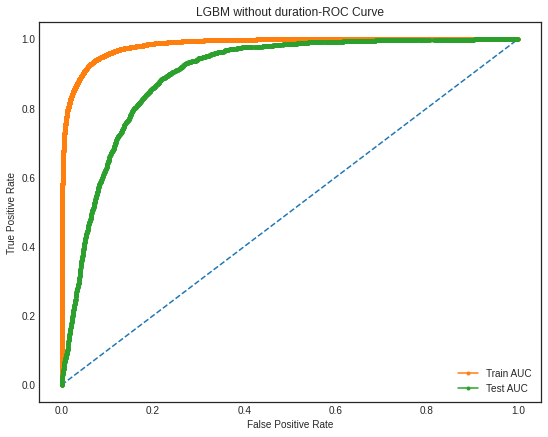

In [140]:
# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train_os, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train_os, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

#score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_os, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM without duration-ROC Curve")
plt.show()

# feature importance for LGBM

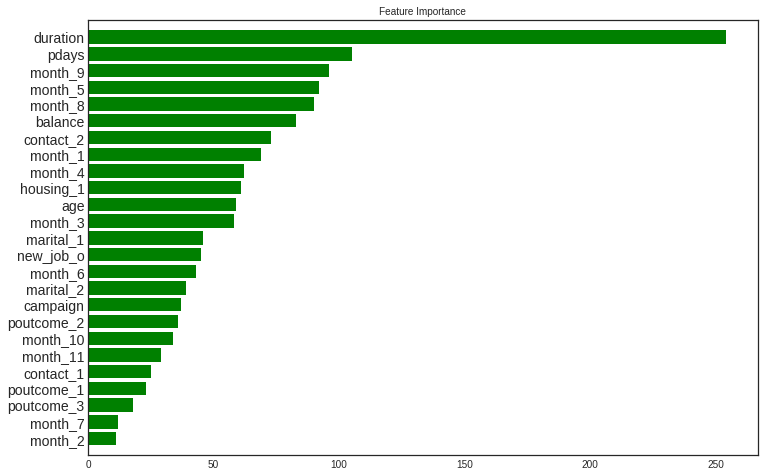

In [141]:
# plt.figure(figsize=(8,15))
# plt.barh(X.columns, lgbm.feature_importances_)
importances=lgbm.feature_importances_
feature_names=X.columns
indices=np.argsort(importances)
plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,8))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

Conclusion -The above plot clearly shows that 'duration' has the highest feature importance.

Note -As per our data avoid 'duration' for building more realistic model. Thus we now removed the 'duration' feature from our list of features and trained the model to see the accuracy score.

# Model Evaluation

# LGBM without 'duration' feature

In [144]:
x_train_os_without_duration = x_train_os.drop(['duration'], axis=1)
x_test_os_without_duration = x_test_r.drop(['duration'], axis=1)

In [145]:
x_train_new = scaler.fit_transform(x_train_os_without_duration)
x_test_new = scaler.transform(x_test_os_without_duration)

In [146]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm_wt = LGBMClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 150)

lgbm_wt.fit(x_train_new,y_train_os)
cv_score = cross_val_score(lgbm_wt,x_train_new,y_train_os,cv=5)

y_pred_lgbm = lgbm_wt.predict(x_test_new)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

Cross_validation score [0.69276018 0.92533937 0.93076923 0.92641868 0.93031044]
LGBM Test accuracy Score 0.8526056810556922
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11839
           1       0.38      0.39      0.38      1574

    accuracy                           0.85     13413
   macro avg       0.65      0.65      0.65     13413
weighted avg       0.85      0.85      0.85     13413



array([[10830,  1009],
       [  968,   606]])

**************************************************
Train AUC: 0.959
Test AUC: 0.750
**************************************************
Train Accuracy: 0.902
Test Accuracy: 0.853


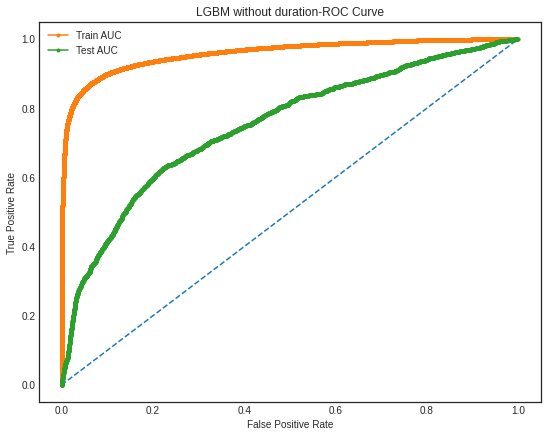

In [147]:
y_probs_train = lgbm_wt.predict_proba(x_train_new)
y_probs_test = lgbm_wt.predict_proba(x_test_new)
y_predicted_train = lgbm_wt.predict(x_train_new)
y_predicted_test = lgbm_wt.predict(x_test_new)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train_os, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train_os, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

#score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_os, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM without duration-ROC Curve")
plt.show()

Conclusion - We can also see the the decrease in AUC on test data after removing the 'duration' feature.

In [148]:
#Hyperparameter Tunning of LGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit


parameters=[{'learning_rate': [ 0.05, 0.05, 0.1, 0.2], 'max_depth': range(3,8), 'n_estimators': range(30, 150, 10)}] 

lgbm_grid=RandomizedSearchCV(lgbm_wt,parameters,scoring='precision',cv=5,verbose=2)
lgbm_grid.fit(x_train_new,y_train_os)

y_pred_lgbm=lgbm_grid.predict(x_test_new)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM_Hypertunning')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=120; total time=   7.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=120; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=120; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=120; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=120; total time=   0.9s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=60; total time=   0.6s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=60; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=60; total time=   0.6s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=60; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=60; total time=   0.6s
[CV] END ...learning_rate=0.05, max_depth=7, n_estimators=80; total time=   0.8s
[CV] END ...learning_rate=0.05, max_depth=7, n_e

array([[10910,   929],
       [  991,   583]])

Conclusion - There was no noticable effect on score with hypertuning.

# Model Evaluation

In [149]:
from prettytable import PrettyTable
print('**** Comparison of different models for Class 1(Yes) oversampled train data  ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])

**** Comparison of different models for Class 1(Yes) oversampled train data  ****


In [150]:
table.add_row(['KNN_with_Duration', 0.848505, 0.41, 0.64, 0.50])
table.add_row(['Random Forest_with_Duration', 0.7896, 0.34, 0.87, 0.49])
table.add_row(['LGBM_with_Duration', 0.82405, 0.38, 0.82, 0.52])
table.add_row(['LGBM_without_Duration', 0.8526, 0.38, 0.39, 0.38])
print(table)

+-----------------------------+---------------+-----------+--------+----------+
|            Model            | Test Accuracy | Precision | Recall | F1_score |
+-----------------------------+---------------+-----------+--------+----------+
|      KNN_with_Duration      |    0.848505   |    0.41   |  0.64  |   0.5    |
| Random Forest_with_Duration |     0.7896    |    0.34   |  0.87  |   0.49   |
|      LGBM_with_Duration     |    0.82405    |    0.38   |  0.82  |   0.52   |
|    LGBM_without_Duration    |     0.8526    |    0.38   |  0.39  |   0.38   |
+-----------------------------+---------------+-----------+--------+----------+


Conclusion = Thus, we can conclude that Light GBM is showing the best score